<br>
<center>
<img src="https://raw.githubusercontent.com/elaynelemos/prediction-of-orders-dmc/main/assets/img/univasf-logo.png" width=200>
<h3>
    UNIVERSIDADE FEDERAL DO VALE DO SÃO FRANCISCO
    <br>COLEGIADO DE ENGENHARIA DE COMPUTAÇÃO
</h3>

<h3>Orientador</h3>
<span>Prof. Dr. Rosalvo Ferreira de Oliveira Neto</span>

<h3>Discentes</h3>
<span>Anísio Pereira Batista Filho
<br>Edjair Aguiar Gomes Filho
<br>Elayne Rute Lessa Lemos</span>
</center>
<br><br>

## Regressão com Redes Neurais

Projeto em: [https://github.com/anisiobfilho/regression_neuralnetworks_univasf](https://github.com/anisiobfilho/regression_neuralnetworks_univasf)

### Importação das bases de dados

In [47]:
import pandas as pd

repo_url = 'https://raw.githubusercontent.com/anisiobfilho/regression_neuralnetworks_univasf/main'

In [48]:
X_train = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_X.csv')
y_train = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_y.csv')
y_train_log = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_train_y_log.csv')

X_test = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_X.csv')
y_test = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_y.csv')
y_test_log = pd.read_csv(f'{repo_url}/data/preprocessed/ic_house_pred_test_y_log.csv')

In [49]:
X_train.sample(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_ausente,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_ausente,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_ausente,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_ausente,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_ausente,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Condition2_PosA,Condition2_RRNn,Electrical_Mix,Exterior1st_ImStucc,RoofMatl_Membran
552,0.588235,0.047945,0.013901,0.666667,0.5,0.971014,0.950000,0.076387,0.195960,0.000000,0.057791,0.203110,0.208123,0.0,0.0,0.170874,0.333333,0.0,0.333333,0.5,0.125,0.5,0.166667,0.000000,0.972727,0.50,0.401269,0.0,0.212066,0.000000,0.0,0.0,0.0,0.0,0.909091,0.25,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
240,0.588235,0.099315,0.031373,0.555556,0.5,0.876812,0.733333,0.000000,0.029235,0.746229,0.255993,0.262520,0.294401,0.0,0.0,0.241711,0.333333,0.0,0.666667,0.0,0.250,0.5,0.250000,0.333333,0.845455,0.50,0.375882,0.0,0.126143,0.000000,0.0,0.0,0.0,0.0,0.545455,0.50,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.000000,0.202055,0.040291,0.444444,0.5,0.594203,0.066667,0.079826,0.062721,0.257320,0.176370,0.172831,0.167279,0.0,0.0,0.137340,0.333333,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.490909,0.25,0.197461,0.0,0.000000,0.297101,0.0,0.0,0.0,0.0,0.090909,1.00,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Treinamento dos modelos

In [50]:
from keras.models  import Sequential
from keras.layers import InputLayer, Dense
from keras.optimizers import adam_v2

#### Com variável alvo sem transformação

In [51]:
input_neuron, hidden_neuron, output_neuron = X_train.shape[-1], int(X_train.shape[-1]*3/10), 1

mlp = Sequential([     
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

In [52]:
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 78)                20436     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 79        
Total params: 20,515
Trainable params: 20,515
Non-trainable params: 0
_________________________________________________________________


In [53]:
mlp.compile(optimizer="adam", loss="mse")

In [54]:
batch_size = 16
epochs = 50
Log = mlp.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
64/64 [==============================] - 0s 2ms/step - loss: 38892531712.0000
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 38892498944.0000
Epoch 3/50
64/64 [==============================] - 0s 2ms/step - loss: 38892498944.0000
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 38892507136.0000
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 38892507136.0000
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 38892503040.0000
Epoch 7/50
64/64 [==============================] - 0s 2ms/step - loss: 38892498944.0000
Epoch 8/50
64/64 [==============================] - 0s 2ms/step - loss: 38892507136.0000
Epoch 9/50
64/64 [==============================] - 0s 2ms/step - loss: 38892494848.0000
Epoch 10/50
64/64 [==============================] - 0s 2ms/step - loss: 38892503040.0000
Epoch 11/50
64/64 [==============================] - 0s 2ms/step - loss: 38892507136.0000
Epoch 12/50
64/64 [

#### Com variável alvo com transformação logarítmica

In [55]:
y_test.max()

SalePrice    755000
dtype: int64

### Medidas de Desempenho
Para este projeto de regressão, utilizou-se:
- **r2_score**(y_test, y_pred)

- **median_absolute_error**(y_test, y_pred)

- **Gráfico de Dispersão**

In [58]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score

def plot_target_metricts(mlp, X_test, y_test):
  y_pred = mlp.predict(X_test)

  r2 = r2_score(y_test, y_pred)

  mae = median_absolute_error(y_test, y_pred)

  # Plot results
  ax = plt.axes()

  ax.scatter(y_test, y_pred)
  ax.plot([0, 80000], [-10000, 80000], '--k')
  ax.set_ylabel('Target predicted')
  ax.set_xlabel('True Target')
  ax.set_title('Sem transformação logarítmica do alvo')
  ax.text(10000, 70000, r'$R^2$=%.2f, MAE=%.2f' % (
      r2, mae))
  ax.set_xlim([0, 80000])
  ax.set_ylim([-10000, 80000])

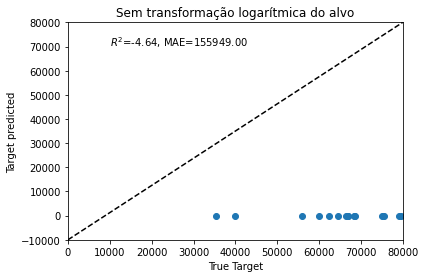

In [59]:
plot_target_metricts(mlp, X_test, y_test)